### Q2) Gradient Descent Algorithm

#### i) 
Consider the last 4 digits of your mobile number (Note : In case there
is a 0 in one of the digits replace it by 3). Let it be n1n2n3n4. Generate
a random matrix A of size n1n2 × n3n4. For example, if the last four
digits are 2311, generate a random matrix of size 23 × 11. Write a code
to calculate the l∞ norm of this matrix.

In [1]:
import numpy as np

In [6]:
def generate_random_matrix(m,n):
        rand_gen = np.random.default_rng()
        return np.round_(rand_gen.uniform(low=0, high=10, size=(m,n)),4)

In [7]:
def l_infinity_norm(A):
    r,c  = A.shape
    max = 0
    for row in A:
        row_sum = sum(row)
        if max < row_sum:
            max = row_sum
    return max

In [13]:
def main_Q2_i():
    # 07...0542
    # n1n2n3n4 = 3542 => 35x42
    A = generate_random_matrix(35, 42)
    print("A: \n",A)
    print("l_infinity_norm = ", l_infinity_norm(A))

In [14]:
main_Q2_i()

A: 
 [[3.7537 4.6111 7.4423 ... 9.327  2.128  7.4313]
 [7.9847 4.4052 3.6403 ... 1.7817 7.8962 6.6332]
 [9.4836 5.8936 0.7717 ... 5.7481 6.4143 5.3507]
 ...
 [4.5869 6.7297 6.0956 ... 9.739  0.9695 9.9127]
 [4.5774 3.7517 1.4167 ... 8.7043 6.8602 6.7845]
 [9.7426 1.7878 2.19   ... 6.5531 6.1136 5.92  ]]
l_infinity_norm =  250.2958


#### Q2) ii)

In [35]:
import math
def vector_l2_norm(a):
    rows = len(a)
    square_sum = 0
    for i in range(rows):
        square_sum += a[i]**2
    return math.sqrt(square_sum)

In [22]:
def matrix_transpose(A):
    r, c = A.shape
    # Initialize transpose
    A_transpose = np.zeros((c,r))
    for row in range(r):
        for col in range(c):
            A_transpose[col,row] = A[row,col]

    return A_transpose

In [23]:
# Perform AxB matrix multiplication
def matrix_multiplication(A,B):
    rA, cA = A.shape
    rB, cB = B.shape
    # Check condition for matrix multiplication
    if cA != rB:
        print("Matrices are not compatible to perform multiplication")
        return None
        
    # Initialize resultant matrix
    C = np.zeros((rA,cB))
    # Multilplication
    for row in range(rA):
        for col in range(cB):
            # Sum of product
            sop = 0
            for i in range(cA):
                sop += A[row,i]*B[i,col]
            C[row,col] = sop

    return C

In [30]:
def function_fx(A,b,x):
    # Check for dimension compatibility
    r_A, c_A = A.shape
    r_b, c_b = b.shape
    r_x, c_x = x.shape

    if (r_A != r_b) or (c_A != r_x):
        print("Dimension incompatibility in A,b,x")
        return None
    
    Ax = matrix_multiplication(A,x)
    return 0.5*((vector_l2_norm(Ax - b))**2)


In [25]:
def gradient_fx(A,b,x):
    # Check for dimension compatibility
    r_A, c_A = A.shape
    r_b, c_b = b.shape
    r_x, c_x = x.shape

    if (r_A != r_b) or (c_A != r_x):
        print("Dimension incompatibility in A,b,x")
        return None

    A_transpose = matrix_transpose(A)
    Ax = matrix_multiplication(A,x)
    Ax_b = Ax - b

    # Return AT(Ax-b)
    return matrix_multiplication(A_transpose, Ax_b)


In [26]:
def get_step_size(A,b,x):
    A_transpose = matrix_transpose(A)
    g_k = gradient_fx(A,b,x)
    g_k_transpose = matrix_transpose(g_k)

    # Calculate step size
    numerator = matrix_multiplication(g_k_transpose, g_k)
    tmp1 = matrix_multiplication(g_k_transpose,A_transpose)
    tmp2 = matrix_multiplication(A,g_k)
    denominator = matrix_multiplication(tmp1,tmp2)

    return numerator/denominator

In [39]:
import pandas as pd

def gradient_descent_algo(A, b):
    # Check for dimension compatibility
    r_A, c_A = A.shape
    r_b, c_b = b.shape
    if r_A != r_b:
        print("No of rows in A and b are different.")
        return None
    # Initial guess for x
    x_k = np.zeros((c_A,1))

    # List to keep estimates of x at each iteration
    x_list = [x_k]
    # List to keep function value at each iteration
    fx_list = [function_fx(A,b,x_k)]

    # Gradient descent iterations
    while True:
        g_k = gradient_fx(A,b,x_k)
        step_size = get_step_size(A,b,x_k)
        
        # Next guess for x
        x_k_plus_1 = x_k - step_size*g_k

        # Error
        error_l2 = vector_l2_norm(x_k - x_k_plus_1)

        # Update x_k
        x_k = x_k_plus_1

        # Store x_k and f(x_k)
        x_list.append(x_k)
        fx_list.append(function_fx(A,b,x_k))

        # Terminating condition
        if error_l2 < 0.0001:
            break

    # Save x_k and f(x_k) values to a file
    df  = pd.DataFrame(data=list(zip(x_list,fx_list)), columns=["x_k", "f(x_k)"])
    print(df)
    df.to_csv("gradient_descent_results.csv")
    
    
    # return List of estimates of x 
    # (last element is the final estimate of local minima)
    return x_list, fx_list

    

In [42]:
import matplotlib.pyplot as plt

def main_Q2_ii():
    # mobile number: 07...0542
    # n1n2n3n4 = 3542 => 35x42
    A = generate_random_matrix(35, 42)

    # vector b - 35x1
    b = generate_random_matrix(35, 1)

    # call gradient descent algorithm
    x_list, fx_list = gradient_descent_algo(A, b)
    print("Local minima estimate: ", x_list[-1])


    # Plot the graph of f(xk) vs k where k is the iteration number and xk is the current estimate of x at iteration k
    k = range(len(fx_list))
    plt.plot(fx_list)
    plt.ylabel('f(xk)')
    plt.xlabel('Iteration')
    plt.show()


                                                   x_k      f(x_k)
0    [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....  585.348258
1    [[0.02439289686593256], [0.02501182510390349],...  144.599424
2    [[-0.025768075616714126], [0.14736089269619795...   75.542881
3    [[-0.021321416767850335], [0.15190069834066744...   64.257116
4    [[-0.013357405205355354], [0.1760687677267757]...   56.600950
..                                                 ...         ...
759  [[0.050197615603232736], [0.7960727111243224],...    0.030491
760  [[0.050127116128899966], [0.7962063654156185],...    0.030309
761  [[0.05014166341990743], [0.7962254439733887], ...    0.030127
762  [[0.05007158797991157], [0.7963582010078112], ...    0.029947
763  [[0.05008604786037713], [0.7963771619734863], ...    0.029768

[764 rows x 2 columns]
Local minima estimate:  [[ 0.05008605]
 [ 0.79637716]
 [-0.51108005]
 [ 0.39943704]
 [ 0.14314554]
 [-0.34054761]
 [ 0.31856375]
 [ 0.17815988]
 [-0.36126704]
 [-0.48569326

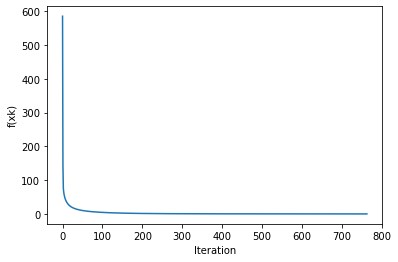

In [43]:
main_Q2_ii()